<a href="https://colab.research.google.com/github/nikdrako/Machine-learning-projects/blob/main/Homework_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from keras import layers
from keras import ops
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,306 (591.04 KB)

 Trainable params: 151,306 (591.04 KB)

 Non-trainable params: 0 (0.00 B)

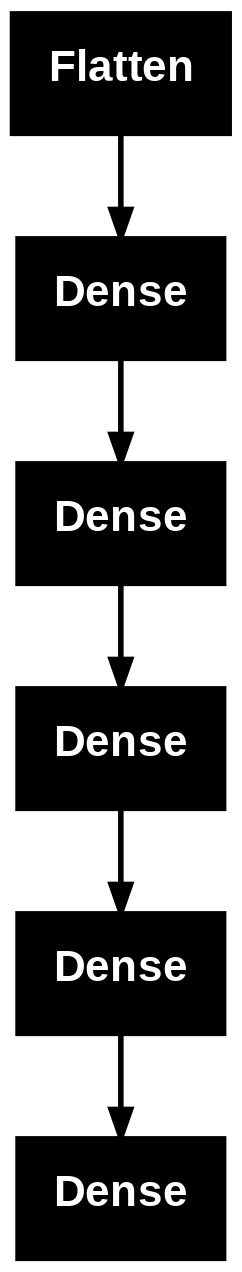

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='Adam',
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=8, validation_split=0.2,verbose = 2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/8


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 - 10s - 6ms/step - accuracy: 0.8630 - loss: 0.8091 - val_accuracy: 0.9205 - val_loss: 0.2851
Epoch 2/8
1500/1500 - 5s - 3ms/step - accuracy: 0.9355 - loss: 0.2271 - val_accuracy: 0.9460 - val_loss: 0.1921
Epoch 3/8
1500/1500 - 5s - 3ms/step - accuracy: 0.9499 - loss: 0.1768 - val_accuracy: 0.9471 - val_loss: 0.1815
Epoch 4/8
1500/1500 - 4s - 3ms/step - accuracy: 0.9579 - loss: 0.1487 - val_accuracy: 0.9546 - val_loss: 0.1638
Epoch 5/8
1500/1500 - 5s - 3ms/step - accuracy: 0.9617 - loss: 0.1324 - val_accuracy: 0.9576 - val_loss: 0.1586
Epoch 6/8
1500/1500 - 5s - 4ms/step - accuracy: 0.9699 - loss: 0.1069 - val_accuracy: 0.9578 - val_loss: 0.1612
Epoch 7/8
1500/1500 - 4s - 3ms/step - accuracy: 0.9722 - loss: 0.0984 - val_accuracy: 0.9628 - val_loss: 0.1413
Epoch 8/8
1500/1500 - 5s - 3ms/step - accuracy: 0.9756 - loss: 0.0845 - val_accuracy: 0.9675 - val_loss: 0.1271
313/313 - 1s - 4ms/step - accuracy: 0.9664 - loss: 0.1289
Test loss: 0.12888093292713165
Test accuracy: 0.9664000

In [ ]:
inputs = keras.Input(shape=(784,))

In [ ]:
img_inputs = keras.Input(shape=(32, 32, 3))


In [ ]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)


In [ ]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [ ]:
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

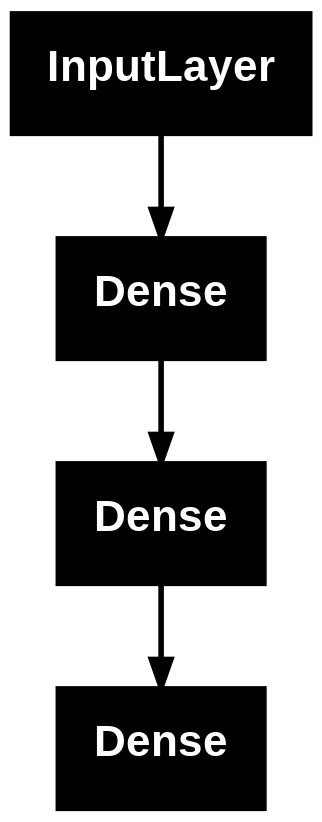

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8355 - loss: 0.5835 - val_accuracy: 0.9465 - val_loss: 0.1824
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9477 - loss: 0.1721 - val_accuracy: 0.9564 - val_loss: 0.1453
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9645 - loss: 0.1163 - val_accuracy: 0.9665 - val_loss: 0.1119
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9720 - loss: 0.0923 - val_accuracy: 0.9672 - val_loss: 0.1138
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9792 - loss: 0.0684 - val_accuracy: 0.9699 - val_loss: 0.1120
313/313 - 1s - 3ms/step - accuracy: 0.9702 - loss: 0.1012
Test loss: 0.10119321197271347
Test accuracy: 0.9702000021934509
